In [1]:
from datasets import list_datasets, load_dataset
all_datasets = list_datasets()
print(f'Available datasets: {len(all_datasets)}')
print(f'The ten first datasets are: {all_datasets[:10]}')

/var/folders/61/66jts0q11blds6prm54dvd1m0000gp/T/ipykernel_9074/2027601445.py:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


Available datasets: 216464
The ten first datasets are: ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [2]:
emotions = load_dataset('emotion')

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_data = emotions['train']
print(f'Train data: {train_data}')

Train data: Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})


In [5]:
print(train_data.column_names)
print(train_data.features)

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [6]:
print(train_data[0]) # Display the first example in the training set
print(train_data[0].get('text'), ",", train_data[0].get('label')) # Display the text and label of the first example  

{'text': 'i didnt feel humiliated', 'label': 0}
i didnt feel humiliated , 0


In [7]:
train_data[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [8]:
# to get the full column by name
train_data['text'][:5] # Display the first 5 texts 

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

From Datasets to DataFrames

In [22]:
import pandas as pd

emotions.set_format(type='pandas')
df = emotions['train'][:]

df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [23]:
print(emotions)

emotions['train'][:5]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [24]:
def label_int_to_str(row):
    # use the int2str method of the label feature to convert the integer label to string
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int_to_str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Class distribution

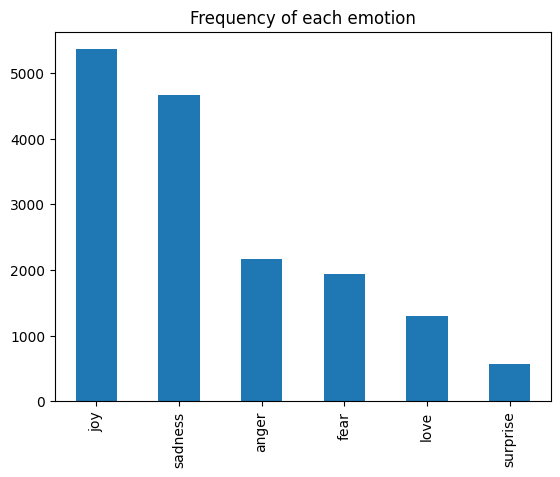

In [26]:
import matplotlib.pyplot as plt

df['label_name'].value_counts().plot(kind='bar')
plt.title("Frequency of each emotion")
plt.show()

In [27]:
df["Word per text"] = df["text"].apply(lambda x: len(x.split()))
df.head()

,text,label,label_name,Word per text
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


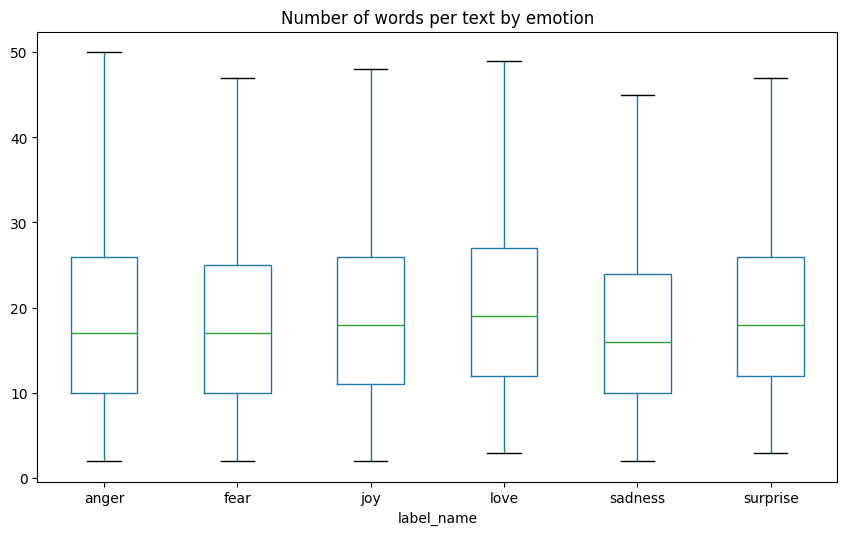

In [29]:
df.boxplot(column="Word per text", by="label_name", showfliers=False, figsize=(10, 6), grid=False)
plt.title("Number of words per text by emotion")
plt.suptitle("")
plt.show()

In [37]:
# reset the format to the default
emotions.reset_format()

print(type(emotions['train']))

<class 'datasets.arrow_dataset.Dataset'>


# Subword Tokenizer

In [38]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/Users/brncat/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [39]:
# optionally I could have loaded the tokenizer as follows

# from transformers import DistilBertTokenizer
# tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [45]:
text = "Tokenizing text is a core task in NLP."

In [46]:
encoded_input = tokenizer(text)
print(encoded_input)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1999, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [47]:
tokens = tokenizer.convert_ids_to_tokens(encoded_input['input_ids'])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'in', 'nl', '##p', '.', '[SEP]']


In [48]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task in nlp. [SEP]


In [50]:
print(f"tokenizer vocabulary size: {tokenizer.vocab_size}")
print(f"tokenizer model max length: {tokenizer.model_max_length}")

tokenizer vocabulary size: 30522
tokenizer model max length: 512


## Tokenizing a Dataset

In [51]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [53]:
print(tokenize(train_data[:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [54]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [57]:
print(emotions_encoded['train'][0])
print(emotions_encoded['train'].column_names)

{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
['text', 'label', 'input_ids', 'attention_mask']
